# Gender Predictions Exploratory Data Analysis

## Imports

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [5]:
# fface_df = pd.read_csv("../data/fface_train.csv")
race_gender_preds_df = pd.read_csv("../data/results/race_gender_preds_fface.csv")

## Preprocess

In [6]:
with open('../data/labels/race_gender_labels.json', encoding='utf-8') as json_data:
    data = json.load(json_data)
    fface_classes = list(data.keys())
    fface_prompts = list(data.values())

In [7]:
print(fface_classes)
print(fface_prompts)

['White_Male', 'White_Female', 'Black_Male', 'Black_Female', 'Latino_Hispanic_Male', 'Latino_Hispanic_Female', 'East Asian_Male', 'East Asian_Female', 'Southeast Asian_Male', 'Southeast Asian_Female', 'Indian_Male', 'Indian_Female', 'Middle Eastern_Male', 'Middle Eastern_Female']
['a photo of a white man', 'a photo of a white woman', 'a photo of a black man', 'a photo of a black woman', 'a photo of a latino man', 'a photo of a latino woman', 'a photo of an east asian man', 'a photo of an east asian woman', 'a photo of a southeast asian man', 'a photo of a southeast asian woman', 'a photo of an indian man', 'a photo of an indian woman', 'a photo of a middle eastern man', 'a photo of a middle eastern woman']


In [8]:
# fface_df = prepare_age(fface_df)
# gender_preds_df = prepare_age(gender_preds_df)

## Initial EDA

In [9]:
print(race_gender_preds_df.shape)
race_gender_preds_df.head()

(10954, 6)


,file,age,gender,race,service_test,gender_preds
0,val/1.jpg,3-9,Male,East Asian,False,Southeast Asian_Male
1,val/2.jpg,50-59,Female,East Asian,True,East Asian_Female
2,val/3.jpg,30-39,Male,White,True,Latino_Hispanic_Male
3,val/4.jpg,20-29,Female,Latino_Hispanic,True,Latino_Hispanic_Female
4,val/5.jpg,20-29,Male,Southeast Asian,False,East Asian_Male


In [10]:
print('Hole dataset race proportions')
race_gender_preds_df.race.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset race proportions


race
White              19.0%
Latino_Hispanic    14.8%
Black              14.2%
East Asian         14.2%
Indian             13.8%
Southeast Asian    12.9%
Middle Eastern     11.0%
Name: proportion, dtype: object

In [11]:
race_gender_preds_df.race.value_counts()

race
White              2085
Latino_Hispanic    1623
Black              1556
East Asian         1550
Indian             1516
Southeast Asian    1415
Middle Eastern     1209
Name: count, dtype: int64

In [12]:
print('Hole dataset gender proportions')
race_gender_preds_df.gender.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset gender proportions


gender
Male      52.9%
Female    47.1%
Name: proportion, dtype: object

In [13]:
race_gender_preds_df.gender.value_counts()

gender
Male      5792
Female    5162
Name: count, dtype: int64

In [14]:
def preds_to_gender(preds):
    gender = preds.split("_")[-1]
    return gender

In [15]:
gender_only_preds = race_gender_preds_df.gender_preds.map(preds_to_gender)

In [16]:
gender_preds_df = race_gender_preds_df.copy()

In [17]:
gender_preds_df['gender_preds'] = gender_only_preds

In [18]:
print('Gender predictions proportions')
gender_preds_df.gender_preds.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Gender predictions proportions


gender_preds
Male      53.6%
Female    46.4%
Name: proportion, dtype: object

In [19]:
gender_preds_df.gender_preds.value_counts()

gender_preds
Male      5868
Female    5086
Name: count, dtype: int64

In [20]:
gender_preds_misses = gender_preds_df[gender_preds_df['gender']
                                          != gender_preds_df['gender_preds']]

In [21]:
gender_preds_acc = accuracy_score(
    gender_preds_df['gender'], gender_preds_df['gender_preds'])
print(f"gender_preds misses count: {len(gender_preds_misses)}")
print(f"gender_preds accuracy score: {round(gender_preds_acc, 2)}")

gender_preds misses count: 534
gender_preds accuracy score: 0.95


In [22]:
male_preds_acc = accuracy_score(
    gender_preds_df[gender_preds_df['gender'] == 'Male']['gender'], gender_preds_df[gender_preds_df['gender'] == 'Male']['gender_preds']
)
print(f"male predictions accuracy score: {round(male_preds_acc, 2)}")

male predictions accuracy score: 0.96


In [23]:
female_preds_acc = accuracy_score(
    gender_preds_df[gender_preds_df['gender'] ==
                        'Female']['gender'], gender_preds_df[gender_preds_df['gender'] == 'Female']['gender_preds']
)
print(f"female predictions accuracy score: {round(female_preds_acc, 2)}")

female predictions accuracy score: 0.94


## Plots

Gender predictions confusion matrix


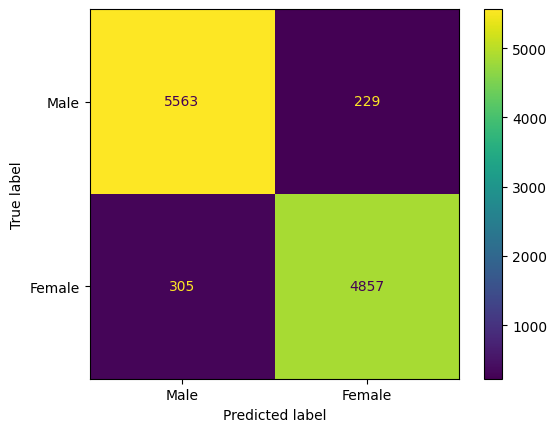

In [24]:
y_test = gender_preds_df['gender'].to_numpy()
binary_gender_predictions = gender_preds_df['gender_preds'].to_numpy()
gender_labels = ['Male', 'Female']
cm = confusion_matrix(y_test, binary_gender_predictions, labels=gender_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=gender_labels)
print("Gender predictions confusion matrix")
disp.plot()

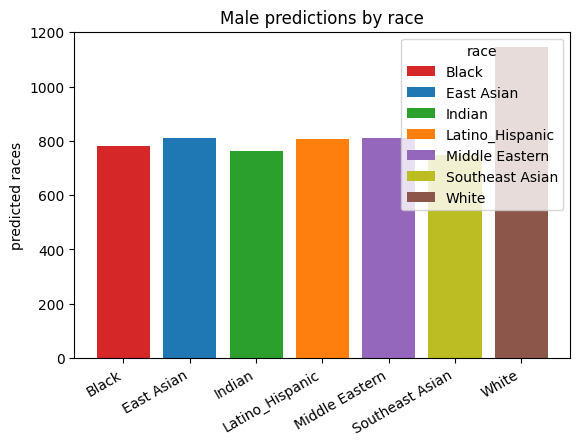

In [26]:
fig, ax = plt.subplots()

races = gender_preds_df['race'].unique()
races.sort()
counts = gender_preds_df[gender_preds_df['gender_preds'] == 'Male']['race'].value_counts().sort_index()
race_labels = races.copy()
bar_colors = ['tab:red', 'tab:blue', 'tab:green',
              'tab:orange', 'tab:purple', 'tab:olive', 'tab:brown']

ax.bar(races, counts, label=race_labels, color=bar_colors)

ax.set_ylabel('predicted races')
ax.set_title('Male predictions by race')
ax.legend(title='race')
ax.figure.autofmt_xdate()

plt.show()

In [27]:
races

array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White'], dtype=object)

In [28]:
counts.sort_index()

race
Black               781
East Asian          811
Indian              762
Latino_Hispanic     808
Middle Eastern      812
Southeast Asian     749
White              1145
Name: count, dtype: int64